<a href="https://colab.research.google.com/github/Sam120900/Colab-Notebooks/blob/main/cifar10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YT : Codebasics tutorial followed below

In [47]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [48]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [49]:
x_train.shape 
#50000 training images, with 32 height, 32 widths and 3 channels (which means it is rgb (colored))

(50000, 32, 32, 3)

In [50]:
x_test.shape

(10000, 32, 32, 3)

In [51]:
x_train[0] #you get a 3d array; 32 x 32 x 3

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [52]:
print(y_train) #this is a 2d array
print(y_train.shape) #this is a 2d array

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
(50000, 1)


In [53]:
y_train = y_train.reshape(-1,) #-1 is to keep the first element of y_tran.shape, which is the number of samples, as the same
print(y_train)
print(y_train.shape) # now a 1d array

[6 9 9 ... 9 1 1]
(50000,)


In [54]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [73]:
def plot_sample(x, y, index):
  plt.figure(figsize = (15, 4))
  plt.imshow(x[index])
  #we want our x label to be the name of the class. so for that i will write a 1d array with the class names
  #but we cant use that because our y_train, which has the labels, is in the form of a 2d array
  #so we have to go back and turn that 2d array into a 1d array
  plt.xlabel(classes[y[index]])

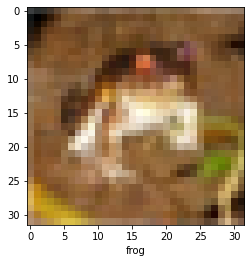

In [56]:
plot_sample(x_train, y_train, 0) #now you can see that the image prints out with the label

In [57]:
print(x_train[0]) #you can see that the values range from 0 - 255. so we will normalize this by diving it by 255

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [58]:
x_train[0]/255 #now we have to do this for the whole of x data like shown in the next cell

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [59]:
x_train = x_train / 255
x_test = x_test / 255
#now our x data has been normalized

In [60]:
ann = models.Sequential([
        layers.Flatten(input_shape = (32,32,3)),
        layers.Dense(3000, activation = 'relu'),
        layers.Dense(1000, activation = 'relu'),
        layers.Dense(10, activation = 'sigmoid')
])

ann.compile(optimizer='SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

ann.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8107 - accuracy: 0.3524
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6239 - accuracy: 0.4267
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5431 - accuracy: 0.4555
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4849 - accuracy: 0.4763
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4337 - accuracy: 0.4961


In [61]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5736 - accuracy: 0.4446


[1.573641300201416, 0.444599986076355]

In [62]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification report : \n', classification_report(y_test, y_pred_classes))

Classification report : 
               precision    recall  f1-score   support

           0       0.53      0.43      0.47      1000
           1       0.56      0.61      0.59      1000
           2       0.46      0.18      0.26      1000
           3       0.46      0.17      0.25      1000
           4       0.33      0.60      0.43      1000
           5       0.49      0.21      0.29      1000
           6       0.60      0.39      0.47      1000
           7       0.64      0.42      0.51      1000
           8       0.37      0.83      0.51      1000
           9       0.40      0.60      0.48      1000

    accuracy                           0.44     10000
   macro avg       0.48      0.44      0.43     10000
weighted avg       0.48      0.44      0.43     10000



In [63]:
cnn = models.Sequential([
        #conv layers
        layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
        layers.MaxPooling2D((2,2)),
        #dense layers
        layers.Flatten(),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(10, activation = 'softmax'), 
])

In [64]:
cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [65]:
cnn.fit(x_train, y_train, epochs= 10)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.4414 - accuracy: 0.4829
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1014 - accuracy: 0.6132
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9779 - accuracy: 0.6598
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8944 - accuracy: 0.6889
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8274 - accuracy: 0.7110
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7734 - accuracy: 0.7328
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7282 - accuracy: 0.7455
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6854 - accuracy: 0.7600
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6477 - accuracy: 0.7727
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.609

In [66]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9453 - accuracy: 0.6917


[0.9452756643295288, 0.6916999816894531]

In [67]:
y_test2 = y_test.reshape(-1,)
y_test2

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

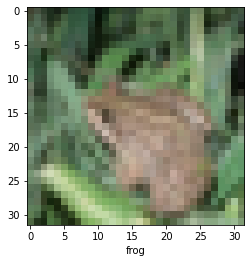

In [83]:
plot_sample(x_test, y_test2, 4)

#from this we know that our second pic is a ship

In [75]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[2.3929730e-04, 2.3130095e-03, 1.8532659e-03, 6.6956764e-01,
        2.8803607e-03, 9.9141270e-02, 2.4143983e-02, 5.3859792e-05,
        1.9732028e-01, 2.4870988e-03],
       [5.4860666e-02, 1.4138494e-02, 9.5056961e-08, 5.3467983e-07,
        4.7950175e-06, 9.1534496e-09, 5.7117910e-10, 3.1763239e-08,
        9.3080312e-01, 1.9232924e-04],
       [2.2464834e-02, 3.6663809e-01, 1.8119271e-04, 1.8225552e-03,
        2.0329920e-03, 2.8604342e-04, 2.3359168e-04, 4.3298685e-04,
        5.6231028e-01, 4.3597475e-02],
       [7.0986944e-01, 6.2414277e-02, 5.2129768e-04, 2.9530271e-04,
        7.1643031e-04, 5.0423131e-07, 5.0774834e-06, 2.0251341e-06,
        2.2545460e-01, 7.2106195e-04],
       [3.0366107e-06, 2.1584872e-04, 2.1601900e-02, 1.3873288e-01,
        2.2653514e-01, 2.2875911e-03, 6.1021459e-01, 4.5053821e-05,
        3.5954791e-04, 4.4770254e-06]], dtype=float32)

In [79]:
y_classes = [np.argmax(element) for element in y_pred]
print('Predicted :', y_classes[:5])
print('True :', y_test2[:5])

#from this we can see that our second image has been classified as class 8 and we already know that class 8 is a ship.
#so, the prediction was correct

#what we're checking is only the forst 5 images and they'r all correct. it's perfectly okay to have wrong answers and it's
#expected even, because our accuracy is only 70%

Predicted : [3, 8, 8, 0, 6]
True : [3 8 8 0 6]


In [84]:
print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1000
           1       0.80      0.78      0.79      1000
           2       0.67      0.54      0.60      1000
           3       0.62      0.36      0.46      1000
           4       0.58      0.72      0.64      1000
           5       0.66      0.55      0.60      1000
           6       0.75      0.76      0.76      1000
           7       0.63      0.81      0.71      1000
           8       0.72      0.85      0.78      1000
           9       0.74      0.81      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000



In [85]:
! git init

Initialized empty Git repository in /content/.git/


In [86]:
! git clone https://github.com/Sam120900/Colab.git

Cloning into 'Colab'...
